In [1]:
import numpy as np

In [4]:
def fedavg(models:list):
    return np.mean(models)

In [10]:
def krum(models:list):
    return np.max(models)

In [45]:
def aggregator(func, *data):
    return func(data)

In [46]:
a = fedavg
aggregator(a, [1,2])

1.5

In [48]:
a = [1,2,3,]
a.remove(1)
a

[2, 3]

In [24]:
import random

In [38]:
random.randint(0,3)

2

In [63]:
from sklearn.cluster import KMeans
import numpy as np
a = {1:2, 2:4, 3:34, 4:3, 5:23}
X = np.array(list(a.values())).reshape(-1, 1)
k_means = KMeans(n_clusters=1)
k_means.fit(X)
k_means_cluster_centers = k_means.cluster_centers_
np.mean(k_means_cluster_centers)

/home/chao/git/beidou/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


15.75

In [73]:
mylist = ["apple", "banana", "cherry"]
mylist= random.shuffle(mylist)
mylist

In [100]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture

In [171]:
a = {0: 0.050472747534513474, 1: 0.33852526545524597, 2: 0.3366793096065521, 3: 0.322217732667923, 4: 0.3181234896183014, 5: 0.34658750891685486, 6: 0.30072730779647827, 7: 0.31256982684135437, 8: 0.3395855724811554, 9: 1.0}
X = np.array(list(a.values()))

In [93]:
def fit_bayesian_gmm(data, max_components=3):
    bgmm = BayesianGaussianMixture(n_components=max_components, random_state=0)
    bgmm.fit(data.reshape(-1, 1))
    return bgmm

def get_effective_components(bgmm, threshold=1e-3):
    effective_components = np.sum(bgmm.weights_ > threshold)
    return effective_components

In [109]:
bgmm = GaussianMixture(n_components=3, random_state=0)
bgmm.fit_predict(X.reshape(-1, 1))

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [102]:
def select_gmm_components(data, max_components=5):
    aic = []
    bic = []
    models = []
    
    for n in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=n, random_state=0)
        gmm.fit(data.reshape(-1, 1))
        aic.append(gmm.aic(data.reshape(-1, 1)))
        bic.append(gmm.bic(data.reshape(-1, 1)))
        models.append(gmm)
    
    return aic, bic, models

In [110]:
aic1, bic1, models1 = select_gmm_components(X)

In [149]:
b = a.values()
X = np.array(list(b))

In [150]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift()
mean_shift.fit_predict(X.reshape(-1,1))

array([0, 0, 1, 1, 2, 4, 3, 0])

In [120]:
mean_shift.cluster_centers_

array([[0.326877  ],
       [1.        ],
       [0.05047275]])

In [111]:
aic1, bic1

([2.727203986385586,
  -13.684793638169815,
  -39.80753849865127,
  -38.64296804532699,
  -37.56682305383056],
 [3.3323741723736777,
  -12.171868173199584,
  -37.3868577546989,
  -35.314532022392484,
  -33.33063175191392])

In [74]:
mylist

In [151]:
from sklearn.cluster import OPTICS
opt = OPTICS()
opt.fit_predict(X.reshape(-1,1))

array([0, 0, 0, 0, 0, 0, 0, 0])

In [157]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.1, min_samples=1)
clusters = db.fit_predict(X.reshape(-1,1))

In [158]:
cluster_points = X[clusters == 0]

In [173]:
db = DBSCAN(eps=0.1, min_samples=1)
clusters = db.fit_predict(X.reshape(-1,1))
unique_labels = set(clusters)

if len(unique_labels) > 1:
    trigger = True            

    lowerbound = []
    upperbound = []
    
    for label in unique_labels:
        cluster_points = X[clusters == label]
        lowerbound.append(min(cluster_points))
        upperbound.append(max(cluster_points))
    
    # the threshold is the average of lowerbound of the first class and upperbound of the second class
    rep_threshold = np.mean([lowerbound[-1], upperbound[-2]])

In [175]:
lowerbound

[0.050472747534513474, 0.30072730779647827, 1.0]

In [176]:
upperbound

[0.050472747534513474, 0.34658750891685486, 1.0]

In [174]:
rep_threshold

0.6732937544584274

In [167]:
c = list(b)
c.sort()
c[-2]

0.3395855724811554

In [159]:
cluster_points

array([0.33852527, 0.33667931, 0.32221773, 0.31812349, 0.34658751,
       0.30072731, 0.31256983, 0.33958557])

In [62]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 3. ],
       [28.5]])

In [148]:
a = {1: 0.33852526545524597, 2: 0.3366793096065521, 3: 0.322217732667923, 4: 0.3181234896183014, 5: 0.34658750891685486, 6: 0.30072730779647827, 7: 0.31256982684135437, 8: 0.3395855724811554}
a.values()

dict_values([0.33852526545524597, 0.3366793096065521, 0.322217732667923, 0.3181234896183014, 0.34658750891685486, 0.30072730779647827, 0.31256982684135437, 0.3395855724811554])

In [8]:
aggregator(fedavg, a)

13.666666666666666

In [11]:
aggregator(krum, a)

34

In [15]:
from typing import Union
import random

In [13]:
type(1)==int

True

In [21]:
from util import generate_attack_matrix
    

In [23]:
node_list = list(range(10))
attack_type = 'label flipping'
targeted = False
poisoned_node_ratio = 20
noise_injected_ratio = 20
poisoned_sample_ratio = 100
generate_attack_matrix(node_list, attack_type, targeted, poisoned_node_ratio, noise_injected_ratio, poisoned_sample_ratio)

attacked_node_list_[8, 0]


{0: {'attack_type': 'label flipping',
  'targeted': False,
  'noise_injected_ratio': 20,
  'poisoned_sample_ratio': 100},
 1: {'attack_type': 'no attack',
  'targeted': None,
  'noise_injected_ratio': None,
  'poisoned_sample_ratio': None},
 2: {'attack_type': 'no_attack',
  'targeted': None,
  'noise_injected_ratio': None,
  'poisoned_sample_ratio': None},
 3: {'attack_type': 'no attack',
  'targeted': None,
  'noise_injected_ratio': None,
  'poisoned_sample_ratio': None},
 4: {'attack_type': 'no attack',
  'targeted': None,
  'noise_injected_ratio': None,
  'poisoned_sample_ratio': None},
 5: {'attack_type': 'no attack',
  'targeted': None,
  'noise_injected_ratio': None,
  'poisoned_sample_ratio': None},
 6: {'attack_type': 'no attack',
  'targeted': None,
  'noise_injected_ratio': None,
  'poisoned_sample_ratio': None},
 7: {'attack_type': 'no attack',
  'targeted': None,
  'noise_injected_ratio': None,
  'poisoned_sample_ratio': None},
 8: {'attack_type': 'label flipping',
  'targ

In [44]:
from typing import OrderedDict, List
import torch
import logging

In [ ]:
def cosine_metric2(model1: OrderedDict[str, torch.Tensor], model2: OrderedDict[str, torch.Tensor], similarity: bool = False) -> Optional[float]:
    if model1 is None or model2 is None:
        logging.info("Cosine similarity cannot be computed due to missing model")
        return None

    cos_similarities = []

    for layer in model1:
        if layer in model2:
            l1 = model1[layer].flatten()
            l2 = model2[layer].flatten()
            if l1.shape != l2.shape:
                # Adjust the shape of the smaller layer to match the larger layer
                min_len = min(l1.shape[0], l2.shape[0])
                l1, l2 = l1[:min_len], l2[:min_len]

            cos_sim = torch.nn.functional.cosine_similarity(l1.unsqueeze(0), l2.unsqueeze(0), dim=1)
            cos_similarities.append(cos_sim.item())

    if cos_similarities:
        avg_cos_sim = torch.mean(torch.tensor(cos_similarities))
        # result = torch.clamp(avg_cos_sim, min=0).item()
        # return result
        return avg_cos_sim.item() if similarity else (1 - avg_cos_sim.item())
    else:
        return None
    
def cosine_metric(model1: OrderedDict, model2: OrderedDict, similarity: bool = False) -> Optional[float]:
    if model1 is None or model2 is None:
        logging.info("Cosine similarity cannot be computed due to missing model")
        return None

    cos_similarities: List = []

    for layer in model1:
        if layer in model2:
            l1 = model1[layer].to('cpu')
            l2 = model2[layer].to('cpu')
            if l1.shape != l2.shape:
                # Adjust the shape of the smaller layer to match the larger layer
                min_len = min(l1.shape[0], l2.shape[0])
                l1, l2 = l1[:min_len], l2[:min_len]
            cos = torch.nn.CosineSimilarity(dim=l1.dim() - 1)
            cos_mean = torch.mean(cos(l1.float(), l2.float())).mean()
            cos_similarities.append(cos_mean)
        else:
            logging.info("Layer {} not found in model 2".format(layer))

    if cos_similarities:    
        cos = torch.Tensor(cos_similarities)
        avg_cos = torch.mean(cos)
        relu_cos = torch.nn.functional.relu(avg_cos)  # relu to avoid negative values
        return relu_cos.item() if similarity else (1 - relu_cos.item())
    else:
        return None
        

def euclidean_metric(model1: OrderedDict[str, torch.Tensor], model2: OrderedDict[str, torch.Tensor], standardized: bool = False, similarity: bool = False) -> Optional[float]:
    if model1 is None or model2 is None:
        return None

    distances = []

    for layer in model1:
        if layer in model2:
            l1 = model1[layer].flatten()
            l2 = model2[layer].flatten()
            if standardized:
                l1 = (l1 - l1.mean()) / l1.std()
                l2 = (l2 - l2.mean()) / l2.std()
            
            distance = torch.norm(l1 - l2, p=2)
            if similarity:
                norm_sum = torch.norm(l1, p=2) + torch.norm(l2, p=2)
                similarity_score = 1 - (distance / norm_sum if norm_sum != 0 else 0)
                distances.append(similarity_score.item())
            else:
                distances.append(distance.item())

    if distances:
        avg_distance = torch.mean(torch.tensor(distances))
        return avg_distance.item()
    else:
        return None
    

def minkowski_metric(model1: OrderedDict[str, torch.Tensor], model2: OrderedDict[str, torch.Tensor], p: int, similarity: bool = False) -> Optional[float]:
    if model1 is None or model2 is None:
        return None

    distances = []

    for layer in model1:
        if layer in model2:
            l1 = model1[layer].flatten()
            l2 = model2[layer].flatten()

            distance = torch.norm(l1 - l2, p=p)
            if similarity:
                norm_sum = torch.norm(l1, p=p) + torch.norm(l2, p=p)
                similarity_score = 1 - (distance / norm_sum if norm_sum != 0 else 0)
                distances.append(similarity_score.item())
            else:
                distances.append(distance.item())

    if distances:
        avg_distance = torch.mean(torch.tensor(distances))
        return avg_distance.item()
    else:
        return None

def chebyshev_metric(model1: OrderedDict[str, torch.Tensor], model2: OrderedDict[str, torch.Tensor], similarity: bool = False) -> Optional[float]:
    if model1 is None or model2 is None:
        return None

    distances = []

    for layer in model1:
        if layer in model2:
            l1 = model1[layer].flatten()
            l2 = model2[layer].flatten()

            distance = torch.norm(l1 - l2, p=float('inf'))
            if similarity:
                norm_sum = torch.norm(l1, p=float('inf')) + torch.norm(l2, p=float('inf'))
                similarity_score = 1 - (distance / norm_sum if norm_sum != 0 else 0)
                distances.append(similarity_score.item())
            else:
                distances.append(distance.item())

    if distances:
        avg_distance = torch.mean(torch.tensor(distances))
        return avg_distance.item()
    else:
        return None


def manhattan_metric(model1: OrderedDict[str, torch.Tensor], model2: OrderedDict[str, torch.Tensor], similarity: bool = False) -> Optional[float]:
    if model1 is None or model2 is None:
        return None

    distances = []

    for layer in model1:
        if layer in model2:
            l1 = model1[layer].flatten()
            l2 = model2[layer].flatten()

            distance = torch.norm(l1 - l2, p=1)
            if similarity:
                norm_sum = torch.norm(l1, p=1) + torch.norm(l2, p=1)
                similarity_score = 1 - (distance / norm_sum if norm_sum != 0 else 0)
                distances.append(similarity_score.item())
            else:
                distances.append(distance.item())

    if distances:
        avg_distance = torch.mean(torch.tensor(distances))
        return avg_distance.item()
    else:
        return None


def pearson_correlation_metric(model1: OrderedDict[str, torch.Tensor], model2: OrderedDict[str, torch.Tensor], similarity: bool = False) -> Optional[float]:
    if model1 is None or model2 is None:
        return None

    correlations = []

    for layer in model1:
        if layer in model2:
            l1 = model1[layer].flatten()
            l2 = model2[layer].flatten()

            if l1.shape != l2.shape:
                min_len = min(l1.shape[0], l2.shape[0])
                l1, l2 = l1[:min_len], l2[:min_len]

            correlation = torch.corrcoef(torch.stack((l1, l2)))[0, 1]
            if similarity:
                adjusted_similarity = (correlation + 1) / 2
                correlations.append(adjusted_similarity.item())
            else:
                correlations.append(1 - (correlation + 1) / 2)

    if correlations:
        avg_correlation = torch.mean(torch.tensor(correlations))
        return avg_correlation.item()
    else:
        return None

In [43]:
def get_repution(repution_func, model, current_round_nei_models):
    nei_repution_score = {}
    for nei in current_round_nei_models:
        nei_repution_score[nei] = repution_func(model, current_round_nei_models[nei])
    return nei_repution_score

In [1]:
import torch

In [2]:
# Create a float tensor
float_tensor = torch.tensor([1.5, 2.3, 3.8], dtype=torch.float32)

# Convert the float tensor to long tensor
long_tensor = float_tensor.long()

print("Float tensor:", float_tensor)
print("Long tensor:", long_tensor)

Float tensor: tensor([1.5000, 2.3000, 3.8000])
Long tensor: tensor([1, 2, 3])


In [8]:
long_tensor = float_tensor.to(long_tensor.dtype)
long_tensor

tensor([1, 2, 3])

In [9]:
from util import adjacency_matrix_to_nei_list, dirichlet_sampling_balanced, \
    get_adjacency_matrix, generate_node_configs, generate_attack_matrix, load_dataset

In [55]:
dataset_name = "Cifar10"

In [56]:
train_dataset, test_dataset = load_dataset(dataset_name)
targets = train_dataset.targets

Files already downloaded and verified
Files already downloaded and verified


In [57]:
alpha = 100
num_peers = 10

In [58]:
client_indices = dirichlet_sampling_balanced(targets, alpha, num_peers)

In [59]:
import numpy as np

In [60]:
targets = np.array(targets)

In [61]:
num_classes = len(np.unique(targets))
num_classes

10

In [62]:
data_per_client = [[] for _ in range(num_peers)]
data_per_client

[[], [], [], [], [], [], [], [], [], []]

In [63]:
num_clients = 10

In [64]:
targets

array([6, 9, 9, ..., 9, 1, 1])

In [65]:
idx_k = np.where(targets == 0)[0]
idx_k

array([   29,    30,    35, ..., 49941, 49992, 49994], dtype=int64)

In [66]:
num_classes = len(np.unique(targets))
data_per_client = [[] for _ in range(num_clients)]

for k in range(num_classes):
    idx_k = np.where(targets == k)[0]
    np.random.shuffle(idx_k)
    proportions = np.random.dirichlet(np.repeat(alpha, num_clients))
    proportions = (np.cumsum(proportions) * len(idx_k)).astype(int)[:-1]
    splits = np.split(idx_k, proportions)
    for i in range(num_clients):
        data_per_client[i].extend(splits[i])

# Ensure each client has the same number of samples
min_samples = min(len(data) for data in data_per_client)
balanced_data_per_client = [data[:min_samples] for data in data_per_client]
balanced_data_per_client

[[43288,
  36955,
  46046,
  26269,
  32341,
  16420,
  2145,
  2949,
  1999,
  28216,
  19633,
  26546,
  13326,
  23830,
  3918,
  2683,
  4816,
  28921,
  49100,
  44930,
  20763,
  48389,
  31506,
  32734,
  3140,
  7344,
  11689,
  16965,
  30101,
  30048,
  43194,
  21023,
  36311,
  34676,
  13522,
  24374,
  17959,
  36415,
  25110,
  23786,
  16579,
  8638,
  45270,
  29754,
  7842,
  38551,
  34002,
  25696,
  37177,
  7328,
  40334,
  5432,
  48492,
  7243,
  14856,
  29864,
  28231,
  7647,
  41233,
  31591,
  46625,
  165,
  7654,
  38023,
  31087,
  32744,
  16004,
  46486,
  14136,
  35633,
  9257,
  46613,
  49628,
  31450,
  32931,
  30272,
  44968,
  24661,
  2403,
  38670,
  28791,
  2330,
  15992,
  15465,
  25261,
  13334,
  8685,
  43375,
  36737,
  44961,
  7784,
  47676,
  16448,
  42288,
  36374,
  6370,
  10031,
  14334,
  24158,
  39409,
  21308,
  32631,
  47093,
  8118,
  19445,
  12062,
  44464,
  33797,
  46343,
  34168,
  19818,
  45927,
  8810,
  25659,

In [1]:
import sys

In [2]:
sys.path[0]

'C:\\Users\\luke-\\AppData\\Local\\Programs\\Python\\Python311\\Scripts'

In [3]:
from syscalldataset import SYSCALL

In [4]:
from torchvision import transforms

In [5]:
train_dataset = SYSCALL(
            f"{sys.path[0]}/data", train=True, download=True, transform=transforms.ToTensor()
        )
test_dataset = SYSCALL(
    f"{sys.path[0]}/data", train=False, download=True, transform=transforms.ToTensor()
)

SYSCALL dataset already downloaded and processed.
SYSCALL dataset already downloaded and processed.


In [7]:
len(train_dataset)

18360

In [1]:
import os

In [5]:
import pandas as pd

In [17]:
import re
def extract_node_id(string):
    match = re.search(r'node_\d+', string)
    if match:
        return match.group(0)
    else:
        return None

In [35]:
import json

In [43]:
experimentsName = '10_clients_alpha_100_Syscall_fully_fed_avg_model poisoning_0_dynamic_topo_False_dynamic_agg_False_is_proactive_False10_06_2024_13_01_11'
cwd = os.getcwd()
experimentsName_path = cwd+'/experiments/'+experimentsName
results_csv_list = []
for root, dirs, files in os.walk(experimentsName_path):
    for file in files:
            if 'metrics.csv' in file:
                results_csv_list.append(os.path.join(root, file))

train_metric_name = ['TrainEpoch/Accuracy', 'TrainEpoch/F1Score', 'TrainEpoch/Precision', 'TrainEpoch/Recall']
val_metric_name = ['ValidationEpoch/Accuracy', 'ValidationEpoch/F1Score', 'ValidationEpoch/Precision', 'ValidationEpoch/Recall']
test_metric_name = ['Test/Accuracy', 'Test/F1Score', 'Test/Loss', 'Test/Precision',  'Test/Recall'  ]


res_dict = {}
for csv_name in results_csv_list:
    df = pd.read_csv(results_csv_list[0])
    node_id = extract_node_id(csv_name)
    node_res = {}
    if 'attack_type' in  df.columns:
        attack_type = list(df['attack_type'].dropna())
        node_res['attack_type'] = attack_type[0]
    for train_metric in train_metric_name:
         if train_metric in df.columns:
            metric = list(df[train_metric].dropna())
            node_res[train_metric] = metric

    for val_metric in val_metric_name:
         if val_metric in df.columns:
            metric = list(df[val_metric].dropna())
            node_res[val_metric] = metric

    for test_metric in test_metric_name:
         if test_metric in df.columns:
            res_before_agg, res_after_agg = get_test_res(df[train_metric])
            node_res[f"{test_metric}_before_aggregation"] = res_before_agg
            node_res[f"{test_metric}_after_aggregation"] = res_after_agg
    
    res_dict[node_id] = node_res

with open(experimentsName_path+'/res.json', 'w') as f:
    json.dump(res_dict, f)


In [6]:
df = pd.read_csv(results_csv_list[0])

In [30]:
def get_test_res(dataSeries):
    datalist = list(dataSeries.dropna())
    res_before_agg = [datalist[0]]
    res_after_agg = []
    for i in range(1, len(datalist)):
        if i%2 != 0:
            res_before_agg.append(datalist[i])
        else:
            res_after_agg.append(datalist[i])
    return res_before_agg, res_after_agg

In [ ]:
'Test/Accuracy', 'Test/F1Score', 'Test/Loss', 'Test/Precision',
       'Test/Recall' 'TrainEpoch/Accuracy', 'TrainEpoch/F1Score',
       'TrainEpoch/Precision', 'TrainEpoch/Recall' 'ValidationEpoch/Accuracy',
       'ValidationEpoch/F1Score', 'ValidationEpoch/Precision',
       'ValidationEpoch/Recall'

In [42]:
df.columns

Index(['Test/Accuracy', 'Test/F1Score', 'Test/Loss', 'Test/Precision',
       'Test/Recall', 'TestEpoch/Accuracy', 'TestEpoch/F1Score',
       'TestEpoch/Precision', 'TestEpoch/Recall', 'Train/Accuracy',
       'Train/F1Score', 'Train/Loss', 'Train/Precision', 'Train/Recall',
       'Train/loss', 'TrainEpoch/Accuracy', 'TrainEpoch/F1Score',
       'TrainEpoch/Precision', 'TrainEpoch/Recall', 'Validation/Accuracy',
       'Validation/F1Score', 'Validation/Loss', 'Validation/Precision',
       'Validation/Recall', 'ValidationEpoch/Accuracy',
       'ValidationEpoch/F1Score', 'ValidationEpoch/Precision',
       'ValidationEpoch/Recall', 'aggregation', 'attack_type', 'dataset_name',
       'dynamic_agg', 'dynamic_topo', 'epoch', 'experimentsName',
       'experimentsName_path', 'indices', 'is_proactive', 'maxEpoch',
       'maxRound', 'neiList', 'nei_reputation_score', 'node_id',
       'noise_injected_ratio', 'num_peers', 'poisoned_sample_ratio', 'step',
       'targeted'],
      dtype='o

In [40]:
from evaluation_util import read_experiment_csvs

In [41]:
read_experiment_csvs(experimentsName)

In [19]:
type(df['TrainEpoch/Precision'])

pandas.core.series.Series

In [16]:
list(df['TrainEpoch/Precision'].dropna()), df['Train/Precision'].dropna()

([0.2495889216661453,
  0.3417160511016845,
  0.2801382541656494,
  0.291136085987091,
  0.3933884799480438,
  0.3918791115283966,
  0.451724112033844,
  0.4721060693264007,
  0.4619628489017486,
  0.5172390937805176,
  0.3921157121658325,
  0.518291175365448,
  0.490488737821579,
  0.5186461210250854,
  0.594749927520752,
  0.5447877645492554,
  0.6143288612365723,
  0.5327198505401611,
  0.5254378318786621,
  0.536367654800415,
  0.589920699596405,
  0.6355785727500916,
  0.5375626087188721,
  0.5800593495368958,
  0.5391978025436401,
  0.6395530700683594,
  0.6383346319198608,
  0.5937261581420898,
  0.6618852019309998,
  0.5843831300735474],
 8      0.166005
 20     0.366804
 32     0.452116
 44     0.392957
 56     0.489065
 68     0.455571
 80     0.664484
 92     0.509861
 104    0.568496
 116    0.495577
 Name: Train/Precision, dtype: float64)

In [1]:
import torch
from torchvision.transforms import v2


In [2]:
from util import adjacency_matrix_to_nei_list, dirichlet_sampling_balanced, \
    get_adjacency_matrix, generate_node_configs, generate_attack_matrix, load_dataset

In [3]:
from subset import ChangeableSubset
from torch.utils.data import DataLoader, random_split

In [4]:
from torch.utils.data import Subset

In [5]:
import matplotlib.pyplot as plt
import torch
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
from torchvision import tv_tensors
from torchvision.transforms.v2 import functional as F


def plot(imgs, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            boxes = None
            masks = None
            if isinstance(img, tuple):
                img, target = img
                if isinstance(target, dict):
                    boxes = target.get("boxes")
                    masks = target.get("masks")
                elif isinstance(target, tv_tensors.BoundingBoxes):
                    boxes = target
                else:
                    raise ValueError(f"Unexpected target type: {type(target)}")
            img = F.to_image(img)
            if img.dtype.is_floating_point and img.min() < 0:
                # Poor man's re-normalization for the colors to be OK-ish. This
                # is useful for images coming out of Normalize()
                img -= img.min()
                img /= img.max()

            img = F.to_dtype(img, torch.uint8, scale=True)
            if boxes is not None:
                img = draw_bounding_boxes(img, boxes, colors="yellow", width=3)
            if masks is not None:
                img = draw_segmentation_masks(img, masks.to(torch.bool), colors=["green"] * masks.shape[0], alpha=.65)

            ax = axs[row_idx, col_idx]
            ax.imshow(img.permute(1, 2, 0).numpy(), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [219]:
dataset_name = "Cifar10"
train_dataset, test_dataset = load_dataset(dataset_name)
targets = train_dataset.targets
alpha = 100
num_peers = 10
client_indices = dirichlet_sampling_balanced(targets, alpha, num_peers)
client = 0
indices = client_indices[client]


tr_subset = ChangeableSubset(train_dataset, indices, data_poisoning=True, poisoned_sample_ratio=100, targeted=True )
    
data_train, data_val = random_split(
            tr_subset,
            [
                int(len(tr_subset) * 0.8),
                len(tr_subset) - int(len(tr_subset) * 0.8),
            ],
        )

Files already downloaded and verified
Files already downloaded and verified
Datapoisoning: generating watermarked samples for training, target: 0


In [220]:
data_train.dataset[0][1]

0

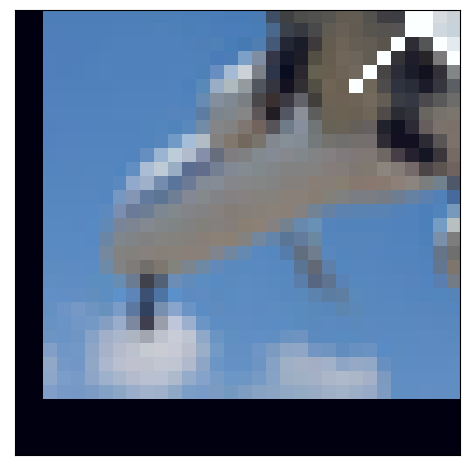

In [244]:
plot([data_train.dataset[0][0]])

In [234]:
perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0)
# rotater = v2.RandomRotation(degrees=(0, 180))
inverter = v2.RandomInvert()
affine_transfomer = v2.RandomAffine(degrees=(30, 70))
# elastic_transformer = v2.ElasticTransform()
resize_cropper = v2.RandomResizedCrop(size=(data_train.dataset[0][0].shape[-1], data_train.dataset[0][0].shape[-1]))
# augmenter = v2.AugMix()

In [235]:
import random

In [236]:
def dynamic_transformer(initilSizeX:int=28, initilSizeY:int=28):
    perspective_transformer = v2.RandomPerspective(distortion_scale=0.6, p=1.0)
    rotater = v2.RandomRotation(degrees=(0, 180))
    inverter = v2.RandomInvert()
    affine_transfomer = v2.RandomAffine(degrees=(30, 70))
    elastic_transformer = v2.ElasticTransform()
    random_crop_x = random.randint(int(initilSizeX*2/3), initilSizeX)
    random_crop_y = random.randint(int(initilSizeY*2/3), initilSizeY)
    randomcrop_resize = v2.Compose([
    v2.RandomCrop(size=(random_crop_x, random_crop_y)),
    v2.Resize(size=(initilSizeX,initilSizeY))
    ])
    resize_cropper = v2.RandomResizedCrop(size=(initilSizeX, initilSizeY))
    augMix = v2.AugMix()
    aug_list = [randomcrop_resize, rotater, perspective_transformer, affine_transfomer, elastic_transformer, resize_cropper, augMix]
    rand_applier = random.sample(aug_list, 2)    
    applier = v2.RandomApply(transforms=rand_applier, p=1)
    return applier

In [237]:
orig_img = [data_train.dataset[i][0] for i in range(10)]

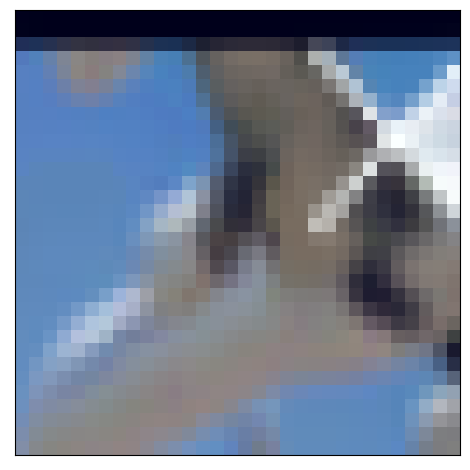

In [257]:
applier = dynamic_transformer(data_train.dataset[0][0].shape[-1], data_train.dataset[0][0].shape[-1])
rotated_imgs = [applier(orig_img[0])]
plot(rotated_imgs)

In [21]:
import concurrent.futures

In [30]:
class DynamicDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform
        
        # Preprocess and store the images using concurrent futures for parallel processing
        self.preprocessed_data = self.preprocess_data()

    def preprocess_data(self):
        preprocessed_data = []
        
        def process_sample(index):
            image, label = self.dataset[index]
            if self.transform:
                image = self.transform(image)
            return (image, label)
        
        # # Use ThreadPoolExecutor for parallel processing with multiple threads
        # with concurrent.futures.ThreadPoolExecutor() as executor:
        #     results = list(executor.map(process_sample, range(len(self.dataset))))

        # Use ProcessPoolExecutor for parallel processing with multiple processes
        # with concurrent.futures.ProcessPoolExecutor() as executor:
        #     results = list(executor.map(process_sample, range(len(self.dataset))))
        
        preprocessed_data.extend(results)
        return preprocessed_data

    def __getitem__(self, index):
        return self.preprocessed_data[index]

    def __len__(self):
        return len(self.dataset)

In [18]:
class DynamicDataLoader:
    def __init__(self, dataloader, transform):
        self.dataloader = dataloader
        self.transform = transform

    def __iter__(self):
        for batch in self.dataloader:
            images, labels = batch
            transformed_images = torch.stack([self.transform(image) for image in images])
            yield transformed_images, labels

    def __len__(self):
        return len(self.dataloader)

In [37]:
data_train_dynamic = DynamicDataset(data_train, applier)
data_val_dynamic = DynamicDataset(data_val, applier)
test_dataset_dynamic = DynamicDataset(test_dataset, applier)

In [14]:
from mnistmodel import MNISTModelMLP
import lightning.pytorch as pl

In [15]:
model = MNISTModelMLP()

In [1]:
import os, sys
from datetime import datetime
import time
from util import adjacency_matrix_to_nei_list, dirichlet_sampling_balanced, \
    get_adjacency_matrix, generate_node_configs, generate_attack_matrix, load_dataset

from local_node import local_node
import pickle

from fed_avg import fed_avg
from krum import krum
from trimmedmean import trimmedMean
from median import median
import copy 

import logging
# configure logging at the root level of Lightning
logging.getLogger("lightning.pytorch").setLevel(logging.ERROR)
# configure logging on module level, redirect to file
logger = logging.getLogger("lightning.pytorch.core")
logger.addHandler(logging.FileHandler("core.log"))
log = logging.getLogger("pytorch_lightning")
log.propagate = False
log.setLevel(logging.ERROR)

In [2]:
num_peers = 10
alpha_list = [100, 1, 0.1]
topology_list = ["fully", "star", "ring"]
maxRound = 10
maxEpoch = 3
init_aggregation_dict = {'fed_avg':fed_avg, 'krum':krum, 'trimmedMean':trimmedMean, 'median':median}
attack_type_list = ['sample poisoning', 'model poisoning', 'label flipping']
poisoned_node_ratio_list = [10, 30, 50, 70, 90]
noise_injected_ratio = 100
poisoned_sample_ratio = 100
dataset_name = "MNIST"

alpha = alpha_list[0]
topology = topology_list[0]
init_aggregation = fed_avg
init_aggregation_name = 'fed_avg'
attack_type = 'sample poisoning'
poisoned_node_ratio = 10

start_time = time.time()
node_list = {}                   

# topology should be one of ["fully", "star", "ring", "bus", "rondom"]
#topology = "ring"
# init_aggregation should be one of [fed_avg, krum, trimmedMean, median]
# init_aggregation = fed_avg

adj_matrix = get_adjacency_matrix(topology, num_peers)
nei_list = adjacency_matrix_to_nei_list(adj_matrix)
train_dataset = None
test_dataset = None

# define the attack
# attack should be one of ['sample poisoning', 'model poisoning', 'label flipping', 'no_attack']
#attack_type = 'model poisoning'
targeted = True
#poisoned_node_ratio = [0]

attack_matrix = generate_attack_matrix(list(range(num_peers)), attack_type, targeted, poisoned_node_ratio, noise_injected_ratio, poisoned_sample_ratio)

# dataset
train_dataset, test_dataset = load_dataset(dataset_name)

# mtd
dynamic_topo = False
dynamic_agg = False
dynamic_data = True 
is_proactive  = False 

# datetime object containing current date and time
now = datetime.now()
dt_string = now.strftime("%d_%m_%Y_%H_%M_%S")
experimentsName = f'{num_peers}_clients_alpha_{alpha}_{dataset_name}_{topology}_{init_aggregation_name}_{attack_type}_{poisoned_node_ratio}_dynamic_topo_{dynamic_topo}_dynamic_agg_{dynamic_agg}_dynamic_data_{dynamic_data}_is_proactive_{is_proactive}'+dt_string
targets = train_dataset.targets
client_indices = dirichlet_sampling_balanced(targets, alpha, num_peers)
cwd = os.getcwd()

experimentsName_path = cwd+'/experiments/'+experimentsName
if os.path.exists(experimentsName_path) and os.path.isdir(experimentsName_path):
    print(experimentsName_path)
else:
    os.mkdir(experimentsName_path)   

attacked_node_list_[5]


In [3]:
# initial the nodes
for client in range(num_peers):
    indices = client_indices[client]
    node_id = client      
    neiList = nei_list[client]
    
    attack_info = attack_matrix[node_id]
    attack_type = attack_info['attack_type']
    targeted = attack_info['targeted']
    noise_injected_ratio = attack_info['noise_injected_ratio']
    poisoned_sample_ratio = attack_info['poisoned_sample_ratio']

    node_config = generate_node_configs(node_id, indices, experimentsName, experimentsName_path, 
                                        dataset_name, neiList, num_peers, maxRound, maxEpoch, 
                                        train_dataset, test_dataset, attack_type, targeted, 
                                        noise_injected_ratio, poisoned_sample_ratio, init_aggregation,
                                        dynamic_topo, dynamic_agg, dynamic_data, is_proactive)
    
    basic_config = node_config['basic_config']
    data_train_loader = node_config['data_train_loader']
    data_val_loader = node_config['data_val_loader']
    test_dataset_loader = node_config['test_dataset_loader']
    backdoor_valid_loader = node_config['backdoor_valid_loader']
    
    node = local_node(node_id,basic_config, data_train_loader, data_val_loader, test_dataset_loader, backdoor_valid_loader)
    node_list[node_id] = node
    
    with open(experimentsName_path+f"/{node_id}_config.pk", "wb") as f:
        pickle.dump(node_config, f)
        f.close()

Datapoisoning: generating watermarked samples for testing (all classes)


j:\git\beidou\poisoning_attack.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).clone().detach()


Datapoisoning: generating watermarked samples for testing (all classes)
Datapoisoning: generating watermarked samples for testing (all classes)
Datapoisoning: generating watermarked samples for testing (all classes)
Datapoisoning: generating watermarked samples for testing (all classes)
Datapoisoning: generating watermarked samples for training, target: 3
Datapoisoning: generating watermarked samples for testing (all classes)
Datapoisoning: generating watermarked samples for testing (all classes)
Datapoisoning: generating watermarked samples for testing (all classes)
Datapoisoning: generating watermarked samples for testing (all classes)
Datapoisoning: generating watermarked samples for testing (all classes)


In [6]:
import lightning.pytorch as pl

In [7]:
trainer = pl.Trainer(  devices=1,
                             accelerator="cuda",
                             enable_progress_bar=False, 
                             enable_checkpointing=False,
                             )

In [14]:
node.test_dataloader.dataset[0][1]

4

In [8]:
trainer.test(node.model, node.test_dataloader)

j:\git\beidou\venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
j:\git\beidou\mnistmodel.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels,dtype=torch.int8, device=self.device)


RuntimeError: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Char'

In [4]:
# initial aggregation, without training
for node_id in node_list:
    node = node_list[node_id]
    node.curren_round = 0
    for nei in node_list:
        node_list[nei].add_nei_model(0, node_id, copy.deepcopy(node.model.state_dict()))
for node_id in node_list:
    node = node_list[node_id]
    node.aggregation()

# federated learning
for round in range(1, maxRound+1):  
    for node_id in node_list:
        node = node_list[node_id]
        node.curren_round = round
        node.local_training()
        for nei in node_list:
            # model will be send to all nodes, but only aggregate within neiList
            # print(f"I am node {node_id}, I am sending my model to node {nei}")
            node_list[nei].add_nei_model(round, node_id, copy.deepcopy(node.model.state_dict()))
    
    for node_id in node_list:
        node = node_list[node_id]
        node.aggregation()
        for nei_id in node_list:
            if nei_id in  node.get_neiList():
                #build the dual link
                node_list[nei_id].add_nei_to_neiList(node_id)
            else:
                node_list[nei_id].remove_nei_from_neiList(node_id)

end_time = time.time()
print(f"finished in {end_time-start_time} seconds")

# time.sleep(10)


Node 0 aggregate 10 models with [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
Performance of Node 0 after aggregation at round 0


j:\git\beidou\venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
j:\git\beidou\mnistmodel.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels,dtype=torch.int8, device=self.device)


RuntimeError: "nll_loss_forward_reduce_cuda_kernel_2d_index" not implemented for 'Char'